<a href="https://colab.research.google.com/github/andrejfg/Titanic_Kaggle/blob/main/Titanic_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregamento do Dataset

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! rm -rf ~/.kaggle
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
! kaggle competitions download -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 30.0MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.68MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 51.8MB/s]


# Imports Básicos

In [ ]:
import pandas as pd
import numpy as np

# Preprocessamento

## Leitura de csv e remoção da coluna PassengerId

In [ ]:
train_titanic = pd.read_csv("train.csv", header=0)
train_titanic = train_titanic.drop(columns='PassengerId')
train_titanic.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [ ]:
test_titanic = pd.read_csv("test.csv",header=0)
test_titanic = test_titanic.drop(columns='PassengerId')
test_titanic.head(5)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Enumeração da coluna "Sex"

In [ ]:
train_titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
test_titanic['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(train_titanic['Sex'])
le.classes_

array(['female', 'male'], dtype=object)

In [ ]:
train_titanic['Sex']= le.transform(train_titanic['Sex'])
train_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_titanic['Sex'] = le.transform(test_titanic['Sex'])
test_titanic.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


 Importação do seaborn para visualização dos valores nulos

In [ ]:
import seaborn as sns

## Mapa de calor para valores nulos no banco de treino

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

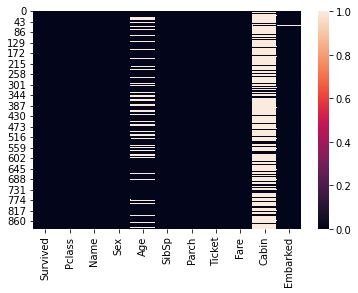

In [ ]:
sns.heatmap(train_titanic.isnull())
train_titanic.isnull().sum()

Remoção da coluna "Cabin"

In [ ]:
train_titanic = train_titanic.drop(columns='Cabin')

## Função para calculo da média de idade baseado por classe da passagem

In [ ]:
def average_Age_Survived(dataset, classes):
  averages = np.zeros(classes)
  for i in range(len(averages)):
    count = dataset['Age'][dataset['Pclass'].eq(i+1)].count();
    sum = dataset['Age'][dataset['Pclass'].eq(i+1)].sum();
    averages[i] = round(sum/count)

  return averages

## Função para completar os valores da idade de acordo com a classe

In [ ]:
def fill_Age_Survived(columns):
  global averages
  age = columns[0];
  pclass = columns[1];
  if pd.isnull(age):
        return averages[int(pclass-1)]
  else: 
      return age 

Substituição dos valores nulos pela média de sua classe

In [ ]:
averages = average_Age_Survived(train_titanic, 3)
train_titanic["Age"]=train_titanic[["Age","Pclass"]].apply(fill_Age_Survived,axis=1) 

train_titanic['Age'].isnull().sum()

0

Verificação de nulos para coluna "Embarked"

In [ ]:
train_titanic[train_titanic['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,NaN


Contagem do termo mais comum

In [ ]:
train_titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Substituição dos valores nulos pelo termo mais frequente

In [ ]:
train_titanic['Embarked'] = train_titanic['Embarked'].fillna('S')
train_titanic['Embarked'].isnull().sum()

0

Mapa de calor para valores nulos no banco de treino

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

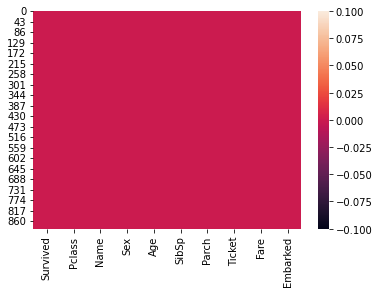

In [ ]:
sns.heatmap(train_titanic.isnull())
train_titanic.isnull().sum()

## Mapa de calor para valores nulos no banco de teste

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

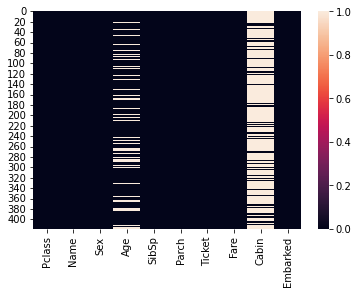

In [ ]:
sns.heatmap(test_titanic.isnull())
test_titanic.isnull().sum()

Remoção da coluna cabine

In [ ]:
test_titanic = test_titanic.drop(columns='Cabin')

Substituição dos valores nulos pela média de sua classe

In [ ]:
averages = average_Age_Survived(test_titanic, 3)
test_titanic["Age"]=test_titanic[["Age","Pclass"]].apply(fill_Age_Survived,axis=1) 

test_titanic['Age'].isnull().sum()

0

Calculo da média do valor "Fare" dentro do banco e substituição do único valor nulo pela média global

In [ ]:
average_Fare = round(test_titanic['Fare'].mean())
test_titanic['Fare'] = test_titanic['Fare'].fillna(average_Fare)

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

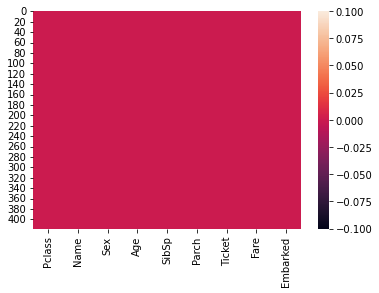

In [ ]:
sns.heatmap(test_titanic.isnull())
test_titanic.isnull().sum()

## Enumeração da coluna "Embarked"

In [ ]:
le2 = preprocessing.LabelEncoder()
le.fit(train_titanic['Embarked'])
le.classes_


array(['C', 'Q', 'S'], dtype=object)

In [ ]:
train_titanic['Embarked'] = le.transform(train_titanic['Embarked'])
test_titanic['Embarked'] = le.transform(test_titanic['Embarked'])

In [ ]:
print(train_titanic['Embarked'].value_counts())
print(test_titanic['Embarked'].value_counts())

2    646
0    168
1     77
Name: Embarked, dtype: int64
2    270
0    102
1     46
Name: Embarked, dtype: int64


In [ ]:
train_titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
5,0,3,"Moran, Mr. James",1,25.0,0,0,330877,8.4583,1
6,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,2
7,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,2
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0


# Separação dos conteúdos relevantes para treinamento do modelo

In [ ]:
values = ["Pclass","Sex", "SibSp", "Parch", "Fare", "Embarked"]

Normalização dos dados de treino

In [ ]:
X_train = train_titanic[values]
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
pd.DataFrame(X_train, columns= values).head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.125,0.0,0.014151,1.0
1,0.0,0.0,0.125,0.0,0.139136,0.0
2,1.0,0.0,0.000,0.0,0.015469,1.0
3,0.0,0.0,0.125,0.0,0.103644,1.0
4,1.0,1.0,0.000,0.0,0.015713,1.0


Normalização dos dados de teste

In [ ]:
X_test = test_titanic[values]
X_test = scaler.fit_transform(X_test)
pd.DataFrame(X_test, columns= values).head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.000,0.000000,0.015282,0.5
1,1.0,0.0,0.125,0.000000,0.013663,1.0
2,0.5,1.0,0.000,0.000000,0.018909,0.5
3,1.0,1.0,0.000,0.000000,0.016908,1.0
4,1.0,0.0,0.125,0.111111,0.023984,1.0


In [ ]:
y = train_titanic["Survived"]
pd.DataFrame(y).head()

,Survived
0,0
1,1
2,1
3,1
4,0


# Carregamento dos rótulos da base de teste

In [ ]:
y_test = pd.read_csv("gender_submission.csv", header = 0)
y_test = y_test["Survived"]
y_test = pd.DataFrame(y_test)
y_test.head()
y_test.value_counts()

Survived
0           266
1           152
dtype: int64

# Importação do modelo de Regressão Linear

Treinamento do modelo

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_LR = LinearRegression().fit(X_train, y)
model_LR.coef_

array([-0.2743342 , -0.52028085, -0.24423542, -0.05807669,  0.17788413,
       -0.07477281])

Predição do modelo

A saída da predição foi arredondada para ter apenas valores 0 e 1

In [ ]:
y_predict_LR = model_LR.predict(X_test)
y_predict_LR = round(pd.DataFrame(y_predict_LR, columns=["Survived"])).astype('int64')
y_predict_LR.head()

,Survived
0,0
1,1
2,0
3,0
4,1


Comparação entre y_test e y_predict

In [ ]:
tmp = [y_test, y_predict_LR]
headers = ["y_test", "y_predict_LR"]
y_predict_LR_y_test = pd.concat(tmp, axis=1, keys=headers)
y_predict_LR_y_test.head(10)

,y_test,y_predict_LR
,Survived,Survived
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
5,0,0
6,1,1
7,0,0
8,1,1


# Carregamento da função de acurácia

In [ ]:
from sklearn.metrics import accuracy_score

Acurácia do modelo de Regressão Linear

In [ ]:
print(f"Acurácia: {(accuracy_score(y_test , y_predict_LR)*100):.2f}%")

Acurácia: 99.04%


In [ ]:
 from sklearn.metrics import confusion_matrix

Matriz de confusão

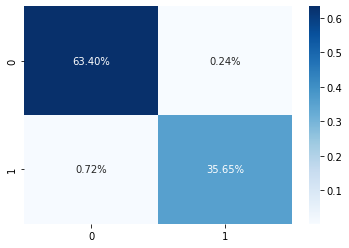

In [ ]:
test_sns_LR = confusion_matrix(y_test, y_predict_LR);
sns.heatmap(test_sns_LR/np.sum(test_sns_LR), annot=True, 
            fmt='.2%', cmap='Blues')

# Importação do modelo de SVM

In [ ]:
from sklearn import svm

In [ ]:
model_SVM = svm.SVC(kernel="rbf").fit(X_train, y)

In [ ]:
y_predict_SVM = model_SVM.predict(X_test)
y_predict_SVM = pd.DataFrame(y_predict_SVM, columns=["Survived"])
y_predict_SVM.head()

,Survived
0,0
1,0
2,0
3,0
4,0


In [ ]:
tmp = [y_test, y_predict_SVM]
headers = ["y_test", "y_predict_SVM"]
y_predict_SVM_y_test = pd.concat(tmp, axis=1, keys=headers)
y_predict_SVM_y_test.head(10)

,y_test,y_predict_SVM
,Survived,Survived
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
5,0,0
6,1,1
7,0,0
8,1,1


Acurácia do modelo SVM

In [ ]:
accuracy_SVM = round((accuracy_score(y_test , y_predict_SVM)*100),2)
print(f"Acurácia: {accuracy_SVM}%")

Acurácia: 90.19%


Matriz de confusão

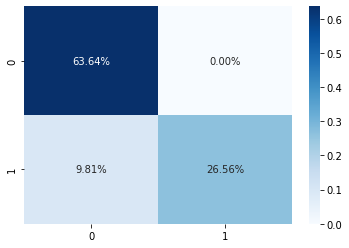

In [ ]:
test_sns_SVM = confusion_matrix(y_test, y_predict_SVM);
sns.heatmap(test_sns_SVM/np.sum(test_sns_SVM), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
tp, fp, fn, tn  = confusion_matrix(y_test, y_predict_SVM).ravel()
print (tp, fp, fn, tn)

266 0 41 111


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test,y_predict_SVM, labels=["0","1"])

0.844106463878327

# Validação cruzada

10 folds

In [ ]:
X = X_train

Importação do framework K-Fold

In [ ]:
from sklearn.model_selection import KFold

## Separação dos folds

In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True);
Xy_folds_train = []
Xy_folds_test = []

for train_index, test_index in kf.split(X):
  X_fold_train, X_fold_test = X[train_index], X[test_index]
  y_fold_train, y_fold_test = y[train_index], y[test_index]
  Xy_folds_train.append(dict({'X':X_fold_train, 'Y':y_fold_train}))
  Xy_folds_test.append(dict({'X':X_fold_test, 'Y':y_fold_test}))
  

Importação da Busca Gulosa

In [ ]:
from sklearn.model_selection import GridSearchCV

Parâmetros para SVM

In [ ]:
model_SVM.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

## Busca Gulosa para melhores parâmetros em 10 folds

In [ ]:
tuned_parameters = {"kernel": ["rbf"], "gamma": [1,1e-1,1e-2,1e-3, 1e-4,1e-5,1e-6,1e-7], "C": [1, 1e1, 1e2, 1e3,1e4,1e5,1e6,1e7]}
models_SVM = []
grid_search_SVM = []
grid_search_results = []
for i in range(len(Xy_folds_train)):
  grid_search_SVM.append(GridSearchCV(svm.SVC(),tuned_parameters));
  grid_search_results.append(grid_search_SVM[i].fit(Xy_folds_train[i]['X'],Xy_folds_train[i]['Y']))
  models_SVM.append(grid_search_results[i].best_estimator_)

## Apresentação dos resultados para busca gulosa entre os folds

Melhor média de acurácia foi 82.04% com desvio padrão de 1.55% utilizando como parâmetros: 'C': 10.0, 'gamma': 1

In [ ]:
sum_bests = 0
counter = 1
#params_df = pd.DataFrame(grid_search_results[0].best_params_, columns=)
for fold in grid_search_results:
  best = round(fold.best_score_*100,2);
  std = round(fold.cv_results_["std_test_score"][fold.cv_results_['rank_test_score'].tolist().index(1)]*100, 2)
  param = fold.best_params_
  print(f"Grid Search no fold {counter}");
  print(f"Melhor acurácia: {best}(+/-{std})% para parâmetros {param}");
  print()
  counter += 1;
  sum_bests += best

mean_bests = round(sum_bests/10,2)

print(f"Acurácia média dos melhores folds: {mean_bests} %")

Grid Search no fold 1
Melhor acurácia: 81.28(+/-2.11)% para parâmetros {'C': 10.0, 'gamma': 1, 'kernel': 'rbf'}

Grid Search no fold 2
Melhor acurácia: 82.04(+/-1.55)% para parâmetros {'C': 1000.0, 'gamma': 0.1, 'kernel': 'rbf'}

Grid Search no fold 3
Melhor acurácia: 81.54(+/-1.48)% para parâmetros {'C': 10.0, 'gamma': 1, 'kernel': 'rbf'}

Grid Search no fold 4
Melhor acurácia: 81.55(+/-1.27)% para parâmetros {'C': 10000.0, 'gamma': 0.01, 'kernel': 'rbf'}

Grid Search no fold 5
Melhor acurácia: 80.8(+/-1.43)% para parâmetros {'C': 1000.0, 'gamma': 0.1, 'kernel': 'rbf'}

Grid Search no fold 6
Melhor acurácia: 80.18(+/-1.36)% para parâmetros {'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}

Grid Search no fold 7
Melhor acurácia: 80.8(+/-1.22)% para parâmetros {'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}

Grid Search no fold 8
Melhor acurácia: 81.92(+/-2.39)% para parâmetros {'C': 10.0, 'gamma': 1, 'kernel': 'rbf'}

Grid Search no fold 9
Melhor acurácia: 82.05(+/-1.67)% para parâmetros {'C': 1

## Captura dos padrões mais frequentemente selecionados como melhor entre os folds

In [ ]:
testando = []
for fold in grid_search_results:
  testando.append(pd.DataFrame([fold.best_params_]))
testando = pd.concat(testando)
for index in testando:
  print(testando[index].value_counts())

10.0        4
100.0       2
1000.0      2
100000.0    1
10000.0     1
Name: C, dtype: int64
0.10    4
1.00    4
0.01    2
Name: gamma, dtype: int64
rbf    10
Name: kernel, dtype: int64


Acurácia: 99.04%
Melhora de: 8.85%


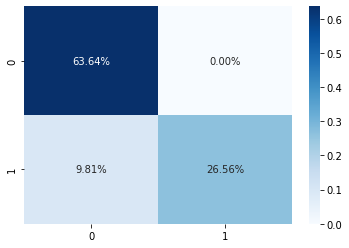

In [ ]:
model_grid_SVM = svm.SVC(gamma=0.1, C=10, kernel="rbf").fit(X_train, y)

y_predict_grid_SVM = model_grid_SVM.predict(X_test)

y_predict_grid_SVM = pd.DataFrame(y_predict_grid_SVM, columns=["Survived"])

accuracy_grid = round((accuracy_score(y_test , y_predict_grid_SVM)*100),2)
print(f"Acurácia: {accuracy_grid}%")
print(f"Melhora de: {round((accuracy_grid - accuracy_SVM),2)  }%")

confusion_matrix_predict_SVM_SVM = confusion_matrix(y_test, y_predict_grid_SVM);

sns.heatmap(test_sns_SVM/np.sum(test_sns_SVM), annot=True, 
            fmt='.2%', cmap='Blues')

# Cluster models

## Kmeans

Importação do modelo Kmeans

In [ ]:
import sklearn.cluster as cluster

In [ ]:
import sklearn.metrics as metrics

Geração do modelo para duas classes (Sobreviveu e Não Sobreviveu)

In [ ]:
kmeans = cluster.KMeans(2)

Faz o fit() para base de treino

In [ ]:
kmeans.fit(X_train)

KMeans(n_clusters=2)

Cria os labels de predição para base de teste

In [ ]:
y_predict_kmeans = kmeans.predict(X_test)

Apresentação dos resultados

In [ ]:
y_predict_kmeans = pd.DataFrame(y_predict_kmeans,columns=["Survived"])

In [ ]:
tmp = [y_test, y_predict_kmeans]
headers = ["y_test", "y_predict_kmeans"]
y_predict_kmeans_y_test = pd.concat(tmp, axis=1, keys=headers)

In [ ]:
y_predict_kmeans_y_test.head()

,y_test,y_predict_kmeans
,Survived,Survived
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1


In [ ]:
resultado_kmeans = metrics.homogeneity_completeness_v_measure(y_test["Survived"],y_predict_kmeans["Survived"])

In [ ]:
silhouete_kmeans = metrics.silhouette_score(X_test,y_predict_kmeans["Survived"])

In [ ]:
resultado_kmeans = list(resultado_kmeans)

In [ ]:
resultado_kmeans.append(silhouete_kmeans)

## Birch

In [ ]:
Birch_model = cluster.Birch()

In [ ]:
Birch_model.fit(X_train)

Birch()

In [ ]:
y_predict_Birch = Birch_model.predict(X_test)

In [ ]:
y_predict_Birch = pd.DataFrame(y_predict_Birch,columns=["Survived"])

In [ ]:
tmp = [y_test, y_predict_Birch]
headers = ["y_test", "y_predict_Birch"]
y_predict_Birch_y_test = pd.concat(tmp, axis=1, keys=headers)

In [ ]:
y_predict_Birch_y_test.head()

,y_test,y_predict_Birch
,Survived,Survived
0,0,0
1,1,2
2,0,0
3,0,0
4,1,2


In [ ]:
resultado_Birch = metrics.homogeneity_completeness_v_measure(y_test["Survived"],y_predict_Birch["Survived"])

In [ ]:
silhouete_birch = metrics.silhouette_score(X_test,y_predict_Birch["Survived"])

In [ ]:
resultado_Birch = list(resultado_Birch)

In [ ]:
resultado_Birch.append(silhouete_birch)

## Resultados

Kmeans obteve melhores resultados comparados ao Birch

In [ ]:
pd.DataFrame([resultado_kmeans,resultado_Birch], columns=["Homogeneidade", "Completude", "V-measure","Silhouete"], index=["Kmeans","Birch"])

,Homogeneidade,Completude,V-measure,Silhouete
Kmeans,1.0,1.000000,1.000000,0.422201
Birch,1.0,0.755615,0.860798,0.418174
